In [5]:
import datetime
import time as tm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

from Model.Model import foodColectionModel

In [6]:
WIDTH = 20
HEIGHT = 20
NUM_AGENTS = 5
TOTAL_FOOD = 47
ITER = 1500
STEPS_TO_COMPLETE = 0
total = 0

model = foodColectionModel(WIDTH, HEIGHT, NUM_AGENTS, TOTAL_FOOD,0)

while True:
    model.step()
    total += 1
    if model.depositQuantity == TOTAL_FOOD:
        STEPS_TO_COMPLETE = total
        print("Food collected at step: ", total)
        break


# for i in range(ITER):
#     model.step()
#     total += 1
#     if model.depositQuantity == TOTAL_FOOD:
#         STEPS_TO_COMPLETE = total
#         print("Food collected at step: ", total)
#         break

Food collected at step:  375


In [7]:
all_data = model.datacollector.get_model_vars_dataframe()

In [8]:
# Animate the data joined

allData = all_data.get("Agents")  + all_data.get("Food")* 10


fig, axis = plt.subplots(figsize=(5, 5))
axis.set_title("Food Colection")
axis.set_xticks([])
axis.set_yticks([])

patch = axis.imshow(allData[10], cmap="Greys")
 
def animate(i):
    patch.set_data(allData[i])
    return patch

plt.close()

anim = animation.FuncAnimation(fig, animate, frames=STEPS_TO_COMPLETE if model.depositQuantity==47 else ITER, interval=100)
anim

# Statistics

In [9]:
def collectStats(width, height, num_agents, total_food):
    model = foodColectionModel(
        width, height, num_agents, total_food, 0)
    total = 0
    while True:
        model.step()
        total += 1
        if model.depositQuantity == total_food:
            steps_to_complete = total
            print("Food collected at step: ", total, "in Size: ", width)
            break
    return steps_to_complete

## Different sizes

In [10]:
lens = [20, 40, 60, 80, 100]
food = 47
agents = 5

statsSizesCollected = []

for size in lens:
    stats = collectStats(size, size, agents, food)
    statsSizesCollected.append(stats)


Food collected at step:  375 in Size:  20
Food collected at step:  847 in Size:  40
Food collected at step:  1304 in Size:  60
Food collected at step:  2178 in Size:  80
Food collected at step:  3084 in Size:  100


## Different food quantities

In [11]:
size = 20
foodsQuantities = [50, 100, 150, 200, 250]
agents = 5

statsFoodsCollected = []

for food in foodsQuantities:
    stats = collectStats(size, size, agents, food)
    statsFoodsCollected.append(stats)

Food collected at step:  455 in Size:  20
Food collected at step:  805 in Size:  20
Food collected at step:  1170 in Size:  20
Food collected at step:  1566 in Size:  20
Food collected at step:  1950 in Size:  20


## Graphs

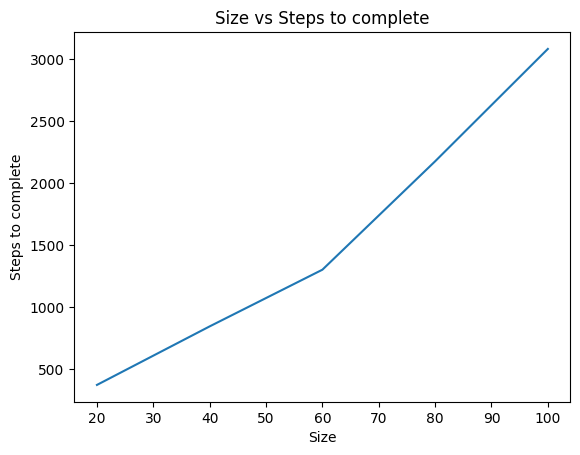

In [12]:
# Plot the size vs steps to complete

plt.plot(lens, statsSizesCollected)
plt.xlabel("Size")
plt.ylabel("Steps to complete")
plt.title("Size vs Steps to complete")
plt.show()

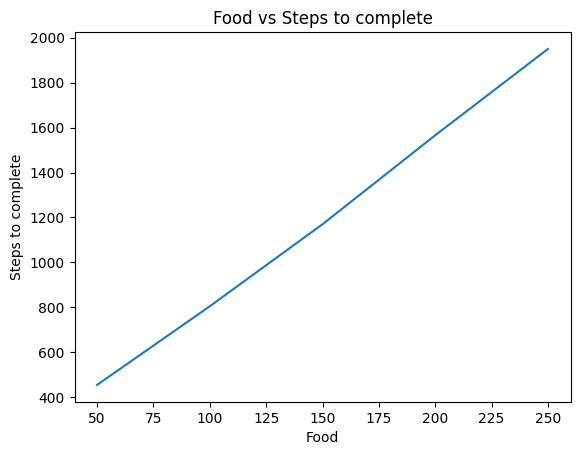

In [13]:
# Plot the food vs steps to complete

plt.plot(foodsQuantities, statsFoodsCollected)
plt.xlabel("Food")
plt.ylabel("Steps to complete")
plt.title("Food vs Steps to complete")
plt.show()